In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [3]:
df = pd.read_csv("bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
df["area_type"].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [11]:
#Another way
df.groupby("area_type")["area_type"].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [12]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [16]:
df1 = df.drop(['area_type', 'availability', 'society', 'balcony'], axis=1)
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [17]:
df1.shape

(13320, 5)

In [18]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [23]:
#drop na of a particular column

df1 = df1.dropna(subset=["location"])
df1.isnull().sum()

location       0
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [24]:
df1.shape

(13319, 5)

In [27]:
df2=df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [28]:
df2.shape

(13246, 5)

In [29]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [30]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [32]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(" ")[0]))

In [33]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [40]:
df2[df2['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [41]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [42]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [45]:
df2[~df2['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [49]:
def sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [74]:
df3 = df2.copy()

df3['total_sqft'] = df3['total_sqft'].apply(sqft_to_num)
df3 = df3[df3['total_sqft'].notnull()]

In [75]:
df3.shape

(13200, 6)

In [76]:
#row which had a range of total_sqft

df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

## Feature Engineering

In [77]:
df3['location'].value_counts()

Whitefield         532
Sarjapur  Road     392
Electronic City    302
Kanakpura Road     264
Thanisandra        232
                  ... 
 Basavangudi         1
Sadhguru Layout      1
Hanumagiri           1
Sadduguntepalya      1
Shivanagar           1
Name: location, Length: 1298, dtype: int64

In [78]:
df3['location'].nunique()

1298

In [79]:
df3['location'] = df3['location'].apply(lambda x: x.strip())

In [84]:
location_stats = df3.groupby('location')['location'].agg('count')

df3['location'] = df3['location'].apply(lambda x: 'other' if x in location_stats[location_stats<=10] else x)

In [85]:
df3.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,other,6 Bedroom,1020.0,6.0,370.00,6


In [86]:
df3['location'].nunique()

241

In [87]:
df4 = df3.copy()

df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']

df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


#### Removing entries where a bedroom size is less than 300sqft

In [91]:
df4 = df4[~(df4['total_sqft']/df4['bhk']<300)]

In [92]:
df4.shape

(12456, 7)

In [93]:
df4['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [96]:
#Huge variation in min and max property prices. Removing outliers per location using mean and one Standard deviation

def remove_pps_outlier(dframe):
    df_out = pd.DataFrame()
    for key, subdf in dframe.groupby('location'):
        mn = np.mean(subdf['price_per_sqft'])
        sd = np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf["price_per_sqft"]>(mn-sd)) & (subdf["price_per_sqft"]<=(mn+sd))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df5=remove_pps_outlier(df4)
df5.shape

(10242, 7)

#### Lets check how 2bhk and 3bhk prices for a location look like

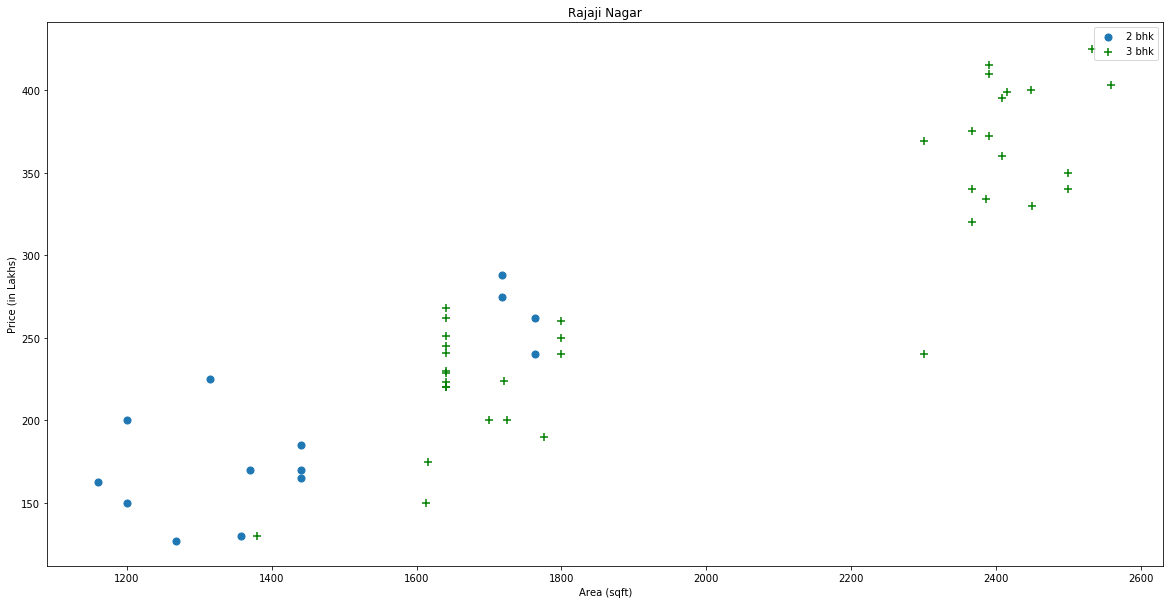

<Figure size 1080x720 with 0 Axes>

In [129]:
def scatter_plot(dframe, location):
    bhk2 = dframe[(dframe['bhk']==2) & (dframe['location']==location)]
    bhk3 = dframe[(dframe['bhk']==3) & (dframe['location']==location)]
    plt.scatter(bhk2['total_sqft'], bhk2['price'], s=50, label='2 bhk')
    plt.scatter(bhk3['total_sqft'], bhk3['price'], marker='+', color='green', s=50, label='3 bhk')
    plt.xlabel('Area (sqft)')
    plt.ylabel('Price (in Lakhs)')
    plt.title(location)
    plt.legend()
    plt.figure(figsize=[15,10])    
    
scatter_plot(df5, "Rajaji Nagar")

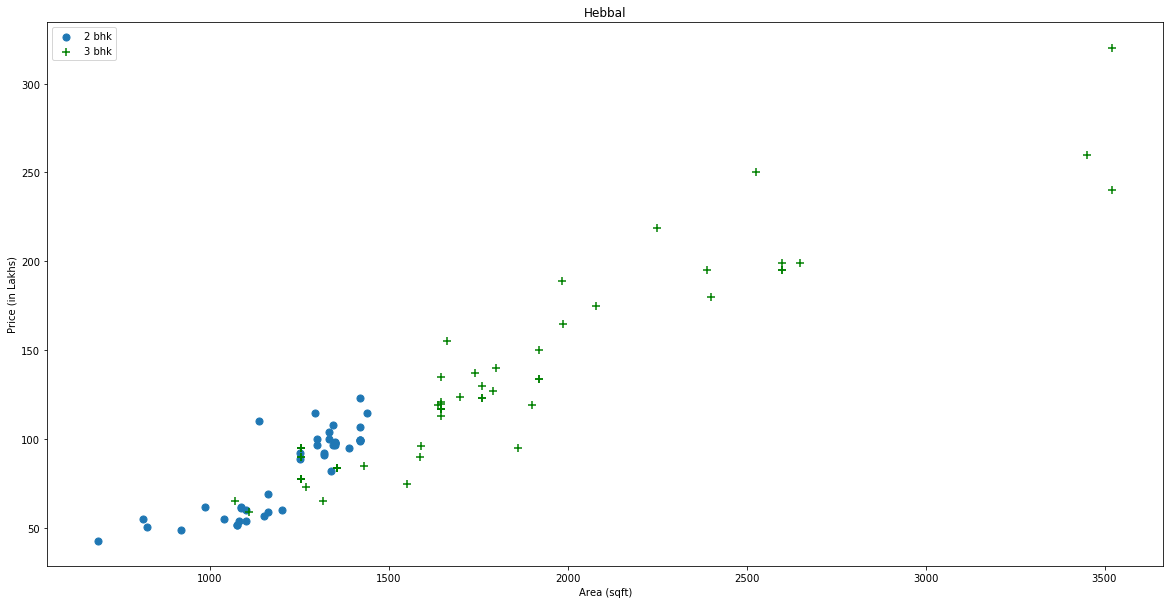

<Figure size 1080x720 with 0 Axes>

In [131]:
scatter_plot(df5, "Hebbal")

In [135]:
def remove_bhk_outliers(dframe):
    exclude_indices = np.array([])
    for location, location_df in dframe.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean' : np.mean(bhk_df['price_per_sqft']),
                'std' : np.std(bhk_df['price_per_sqft']),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price_per_sqft']<(stats['mean'])].index.values)
    return dframe.drop(exclude_indices, axis='index')

df6 = remove_bhk_outliers(df5)
df6.shape

(7317, 7)

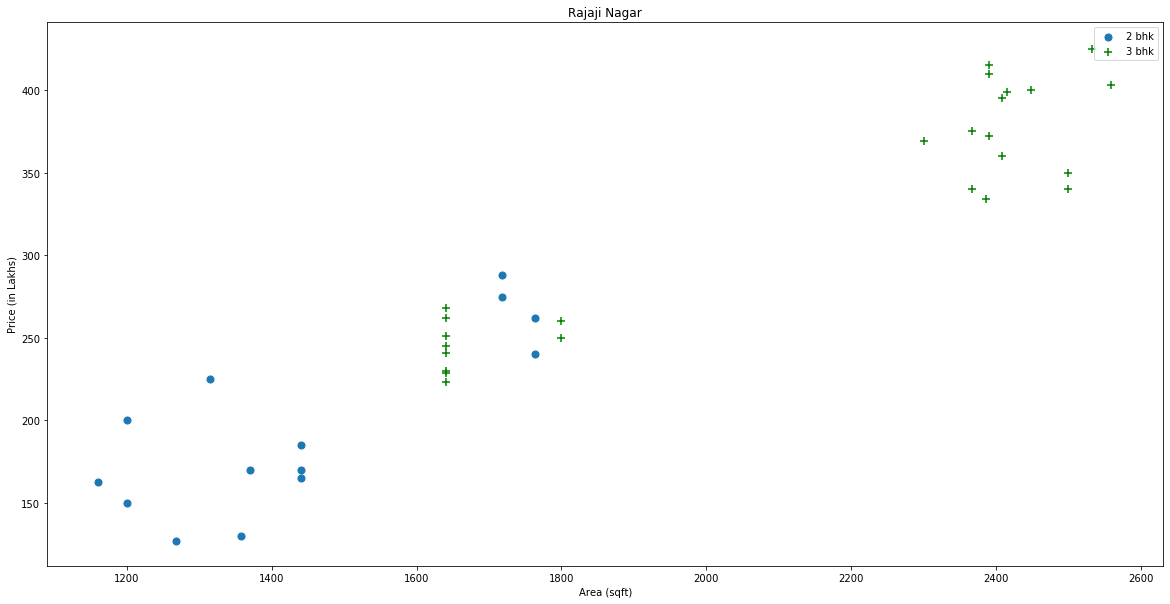

<Figure size 1080x720 with 0 Axes>

In [136]:
scatter_plot(df6, "Rajaji Nagar")

In [137]:
df6[df6['bath']>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [139]:
df7 = df6[df6['bath']<(df6['bhk']+2)]

In [140]:
df7.shape

(7239, 7)

Text(0, 0.5, 'Count')

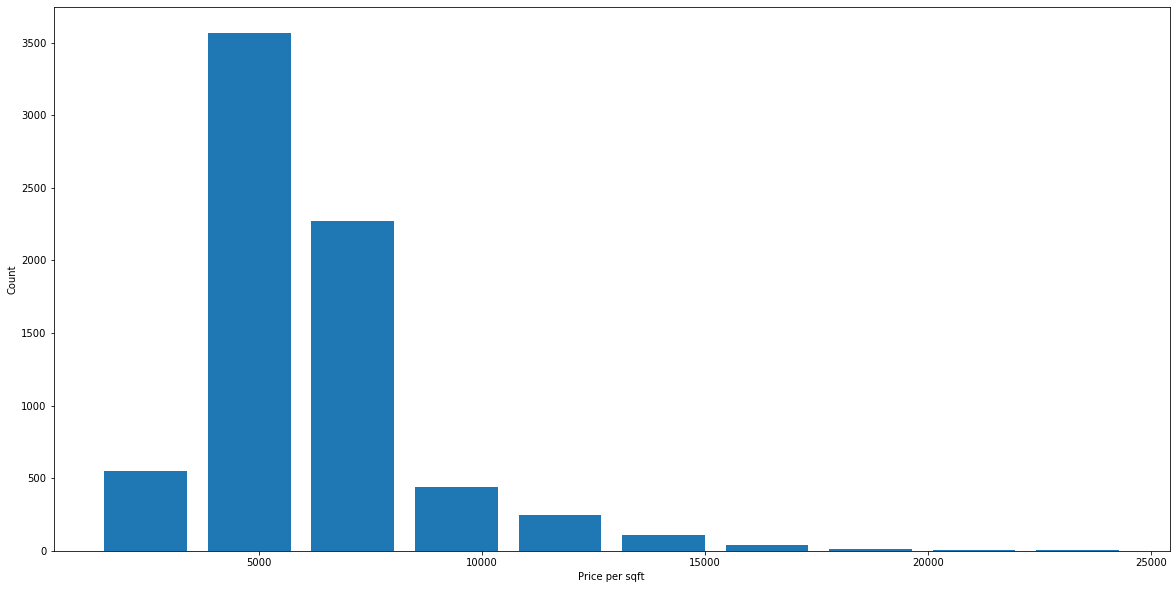

In [142]:
plt.figure(figsize=[20,10])
plt.hist(df7['price_per_sqft'], rwidth=0.8)
plt.xlabel('Price per sqft')
plt.ylabel('Count')

In [145]:
df8 = df7.drop(['size', 'price_per_sqft'], axis=1)
df8.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


## Model Building

### One Hot Encoding

In [146]:
dummies = pd.get_dummies(df8['location'])
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
df9 = pd.concat([df8.drop('location', axis=1), dummies.drop('other', axis=1)],axis = 1)
df9.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
df9.shape

(7239, 244)

## Building Model

In [150]:
X = df9.drop('price', axis=1)
y = df9['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.7971924202569295

In [151]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

### Find best model using GridSearchCV

In [152]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [155]:
def find_best_model_using_GridSearchCV(X, y):
    algos= {
        'linear_regression':{
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        
        'lasso':{
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        
        'decision_tree':{
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
        
    scores=[]
    
    cv = ShuffleSplit(n_splits=5, random_state=0, test_size=0.2)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_GridSearchCV(X, y)

,model,best_score,best_params
0,linear_regression,0.847796,{'normalize': False}
1,lasso,0.726816,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.718783,"{'criterion': 'mse', 'splitter': 'best'}"


#### Linear Regression is best. So we'll use that

## Test the model for few values

In [162]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    
    if loc_index>=0:
        x[loc_index]=1
        
    return model.predict([x])[0]

In [163]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

97.21063159909248

In [164]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

101.59047425998583

In [165]:
predict_price('Indira Nagar',1000, 2, 2)

192.90949707546594

In [166]:
predict_price('Indira Nagar',1000, 3, 3)

197.2893397363593

# Export the model to a pickle file

In [167]:
import pickle

with open("banglore_home_prices_model.pickle", "wb") as f:
    pickle.dump(model, f) #model here is an object of LinearRegression

# Exporting columns and location information

In [168]:
import json

columns={
    'data_columns': [col.lower() for col in X.columns]
}

with open("columns.json", "w") as f:
    f.write(json.dumps(columns))